In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [2]:
import re
from datetime import datetime

In [3]:
data = pd.read_csv("loan.csv",low_memory=False)

In [4]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
missing_columns = data.columns[data.isna().sum()/len(data.index) *100 > 90]

In [8]:
missing_columns

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [9]:
len(missing_columns)

56

In [10]:
data1 = data.drop(missing_columns, axis=1)

In [11]:
len(data1.columns)

55

In [12]:
data1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [13]:
data1.T

,0,1,2,3,4,5,6,7,8,9,...,39707,39708,39709,39710,39711,39712,39713,39714,39715,39716
id,1077501,1077430,1077175,1076863,1075358,1075269,1069639,1072053,1071795,1071570,...,92666,92552,92533,92507,92402,92187,90665,90395,90376,87023
member_id,1296599,1314167,1313524,1277178,1311748,1311441,1304742,1288686,1306957,1306721,...,92661,92542,92529,92502,92390,92174,90607,90390,89243,86999
loan_amnt,5000,2500,2400,10000,3000,5000,7000,3000,5600,5375,...,5000,5000,5000,5000,5000,2500,8500,5000,5000,7500
funded_amnt,5000,2500,2400,10000,3000,5000,7000,3000,5600,5375,...,5000,5000,5000,5000,5000,2500,8500,5000,5000,7500
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0,5000.0,7000.0,3000.0,5600.0,5350.0,...,525.0,375.0,675.0,250.0,700.0,1075.0,875.0,1325.0,650.0,800.0
term,36 months,60 months,36 months,36 months,60 months,36 months,60 months,36 months,60 months,60 months,...,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months
int_rate,10.65%,15.27%,15.96%,13.49%,12.69%,7.90%,15.96%,18.64%,21.28%,12.69%,...,9.33%,9.96%,11.22%,7.43%,8.70%,8.07%,10.28%,8.07%,7.43%,13.75%
installment,162.87,59.83,84.33,339.31,67.79,156.46,170.08,109.43,152.39,121.45,...,159.77,161.25,164.23,155.38,158.3,78.42,275.38,156.84,155.38,255.43
grade,B,C,C,C,B,A,C,E,F,B,...,B,B,C,A,B,A,C,A,A,E
sub_grade,B2,C4,C5,C1,B5,A4,C5,E1,F2,B5,...,B3,B5,C4,A2,B1,A4,C1,A4,A2,E2


In [14]:
data1.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [15]:
data1 = data1.drop(['mths_since_last_delinq','desc'],axis=1)

In [16]:
data1.isna().sum()/len(data1.index)*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [17]:
data1['int_rate'] = data1['int_rate'].str.replace("%","").astype(float)

In [18]:
data1["int_rate"]

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [19]:
data1['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [20]:
data1 = data1[~data1['emp_length'].isnull()]

In [21]:
data1.shape

(38642, 53)

In [22]:
data1["emp_length"] = data1['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

In [23]:
data1["emp_length"]

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38642, dtype: object

In [24]:
data1['emp_length'] = data1['emp_length'].astype(int)

In [25]:
data1['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [26]:
data1 = data1[data1['loan_status']!="Current"]

In [27]:
data1["loan_status"].isna().sum()

0

In [28]:
data1["loan_status"].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

In [29]:
data1['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 37544, dtype: object

In [30]:
data1['issue_d'] = data1['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [31]:
data1["isd_month"] = data1['issue_d'].apply(lambda x:x.month)
data1["isd_year"] = data1['issue_d'].apply(lambda x:x.year)

In [32]:
data1["issue_d"]

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 37544, dtype: datetime64[ns]

In [33]:
data1[["isd_month","isd_year"]]

,isd_month,isd_year
0,12,2011
1,12,2011
2,12,2011
3,12,2011
5,12,2011
...,...,...
39712,7,2007
39713,7,2007
39714,7,2007
39715,7,2007


In [34]:
data1['revol_util']

0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 37544, dtype: object

In [35]:
data1['revol_util'] = data1['revol_util'].str.replace("%","").astype(float)

In [36]:
data1["revol_util"]

0        83.7
1         9.4
2        98.5
3        21.0
5        28.3
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 37544, dtype: float64

In [37]:
req_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
        'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
     'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens', 'isd_month', 'isd_year',
            'loan_status']

In [38]:
data1[req_cols].to_csv("loan-data-processed.csv",index=False)

In [39]:
new_data = pd.read_csv("loan-data-processed.csv")

In [40]:
new_data.shape

(37544, 35)

In [41]:
new_data.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   47
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
chargeoff_within_12_mths     56
pub_rec_bankruptcies        697
tax_lien

In [42]:
new_data = new_data.drop("chargeoff_within_12_mths",axis=1)

In [43]:
new_data = new_data.drop("tax_liens",axis=1)

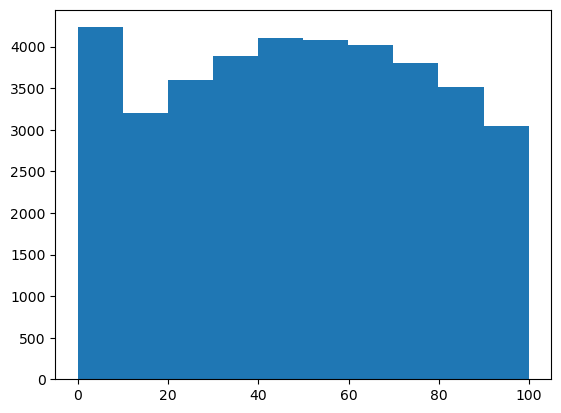

In [44]:
plt.hist(new_data['revol_util'])
plt.show()

In [45]:
median_ru = new_data['revol_util'].median()
new_data['revol_util'] = new_data['revol_util'].fillna(median_ru)
new_data['pub_rec_bankruptcies'] = new_data['pub_rec_bankruptcies'].fillna(0)

In [46]:
new_data.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
pub_rec_bankruptcies       0
isd_month                  0
isd_year                   0
loan_status                0
dtype: int64

In [47]:
new_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [48]:
new_data["term"] = new_data['term'].map({' 36 months':36,' 60 months':60})

In [49]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37544 entries, 0 to 37543
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37544 non-null  int64  
 1   funded_amnt              37544 non-null  int64  
 2   funded_amnt_inv          37544 non-null  float64
 3   term                     37544 non-null  int64  
 4   int_rate                 37544 non-null  float64
 5   installment              37544 non-null  float64
 6   grade                    37544 non-null  object 
 7   sub_grade                37544 non-null  object 
 8   emp_length               37544 non-null  int64  
 9   home_ownership           37544 non-null  object 
 10  annual_inc               37544 non-null  float64
 11  verification_status      37544 non-null  object 
 12  purpose                  37544 non-null  object 
 13  dti                      37544 non-null  float64
 14  delinq_2yrs           

In [50]:
new_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [51]:
new_data['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [52]:
new_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [53]:
new_data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [54]:
new_data['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [55]:
le = LabelEncoder()
new_data["grade"] = le.fit_transform(new_data['grade'])
new_data["sub_grade"] = le.fit_transform(new_data['sub_grade'])
new_data["purpose"] = le.fit_transform(new_data['purpose'])
new_data["loan_status"] = le.fit_transform(new_data['loan_status'])

In [56]:
x = new_data.drop("loan_status",axis=1)
y = new_data['loan_status']

In [57]:
new_data['loan_status'].dtype

dtype('int32')

In [58]:
x = pd.get_dummies(x)


In [59]:
y

0        1
1        0
2        1
3        1
4        1
        ..
37539    1
37540    1
37541    1
37542    1
37543    1
Name: loan_status, Length: 37544, dtype: int32

In [60]:
x.shape

(37544, 38)

In [61]:
x_train, x_test, y_train , y_test = train_test_split(x,y,
                                                    test_size=0.2,random_state=134)

In [66]:
x_train.shape, y_train.shape

((30035, 38), (30035,))

In [67]:
model = Sequential()
model.add(Dense(32, input_shape = (38,),activation = "relu"))
model.add(Dense(32,activation = "relu"))
model.add(Dense(16,activation = "relu"))
model.add(Dense(16,activation = "sigmoid"))
model.add(Dense(16,activation = "linear"))
model.add(Dense(1)) 

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1248      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainabl

In [69]:
model.compile(optimizer="adam", loss = "binary_crossentropy", metrics =['accuracy'])

In [70]:
model.fit(x_train, y_train, epochs =20)

Epoch 1/20
939/939 [==============================] - 4s 2ms/step - loss: 1.8098 - accuracy: 0.7699
Epoch 2/20
939/939 [==============================] - 2s 2ms/step - loss: 0.4114 - accuracy: 0.8576
Epoch 3/20
939/939 [==============================] - 2s 2ms/step - loss: 0.4120 - accuracy: 0.8576
Epoch 4/20
939/939 [==============================] - 2s 2ms/step - loss: 0.4131 - accuracy: 0.8576
Epoch 5/20
939/939 [==============================] - 2s 2ms/step - loss: 0.4134 - accuracy: 0.8576
Epoch 6/20
939/939 [==============================] - 2s 2ms/step - loss: 0.4143 - accuracy: 0.8576
Epoch 7/20
939/939 [==============================] - 2s 2ms/step - loss: 0.4140 - accuracy: 0.8576
Epoch 8/20
939/939 [==============================] - 2s 3ms/step - loss: 0.4140 - accuracy: 0.8576
Epoch 9/20
939/939 [==============================] - 2s 2ms/step - loss: 0.4141 - accuracy: 0.8576
Epoch 10/20
939/939 [==============================] - 2s 2ms/step - loss: 0.4133 - accuracy: 0.8576

In [71]:
model.evaluate(x_test, y_test)

235/235 [==============================] - 1s 2ms/step - loss: 0.4447 - accuracy: 0.8504


[0.4446738660335541, 0.8504461050033569]

In [72]:
model2 = Sequential()
model2.add(Dense(64, input_shape = (38,),activation = "relu"))
model2.add(Dense(32,activation = "relu"))
model2.add(Dense(32,activation = "relu"))
model2.add(Dense(16,activation = "relu"))
model2.add(Dense(16,activation = "sigmoid"))
model2.add(Dense(1)) 

In [73]:

model2.compile(optimizer="adam", loss = "binary_crossentropy", metrics =['accuracy'])

In [74]:
model2.fit(x_train, y_train, epochs =10,batch_size=64)

Epoch 1/10
470/470 [==============================] - 3s 2ms/step - loss: 0.4856 - accuracy: 0.8172
Epoch 2/10
470/470 [==============================] - 1s 2ms/step - loss: 0.4313 - accuracy: 0.8246
Epoch 3/10
470/470 [==============================] - 1s 2ms/step - loss: 0.4094 - accuracy: 0.8576
Epoch 4/10
470/470 [==============================] - 1s 2ms/step - loss: 0.4093 - accuracy: 0.8576
Epoch 5/10
470/470 [==============================] - 1s 2ms/step - loss: 0.4095 - accuracy: 0.8576
Epoch 6/10
470/470 [==============================] - 1s 2ms/step - loss: 0.4095 - accuracy: 0.8576
Epoch 7/10
470/470 [==============================] - 1s 2ms/step - loss: 0.4095 - accuracy: 0.8576
Epoch 8/10
470/470 [==============================] - 1s 2ms/step - loss: 0.4097 - accuracy: 0.8576
Epoch 9/10
470/470 [==============================] - 1s 3ms/step - loss: 0.4096 - accuracy: 0.8576
Epoch 10/10
470/470 [==============================] - 1s 3ms/step - loss: 0.4100 - accuracy: 0.8576

In [75]:
model2.evaluate(x_test, y_test)

235/235 [==============================] - 1s 2ms/step - loss: 0.4240 - accuracy: 0.8504


[0.4239579141139984, 0.8504461050033569]